#Importing Libraries

In [ ]:
  !pip install --upgrade plotly 

In [ ]:
import pandas as pd
import numpy as np 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
# import seaborn as sns
# import matplotlib.pyplot as plt
%matplotlib inline


#Loading The Dataset 

In [ ]:
data = pd.read_csv('/content/Customer Churn.csv')

In [ ]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [ ]:
data.describe(include = 'all')

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [ ]:
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [ ]:
data.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,649.782,122.198,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,235.089,76.121,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,252.288,78.032,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,969.876,157.764,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,90.612,60.068,1


In [ ]:
data['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [ ]:
data['Age Group'].value_counts()

3    1425
2    1037
4     395
5     170
1     123
Name: Age Group, dtype: int64

In [ ]:
data['Tariff Plan'].unique()

array([1, 2])

In [ ]:
data['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [ ]:
ch = {1: 'Churn', 0: 'Non Churn'}
data['Churn'] = data['Churn'].map(ch)

Text(0.5, 1.0, 'Correlation Matrix for Customer Churn')

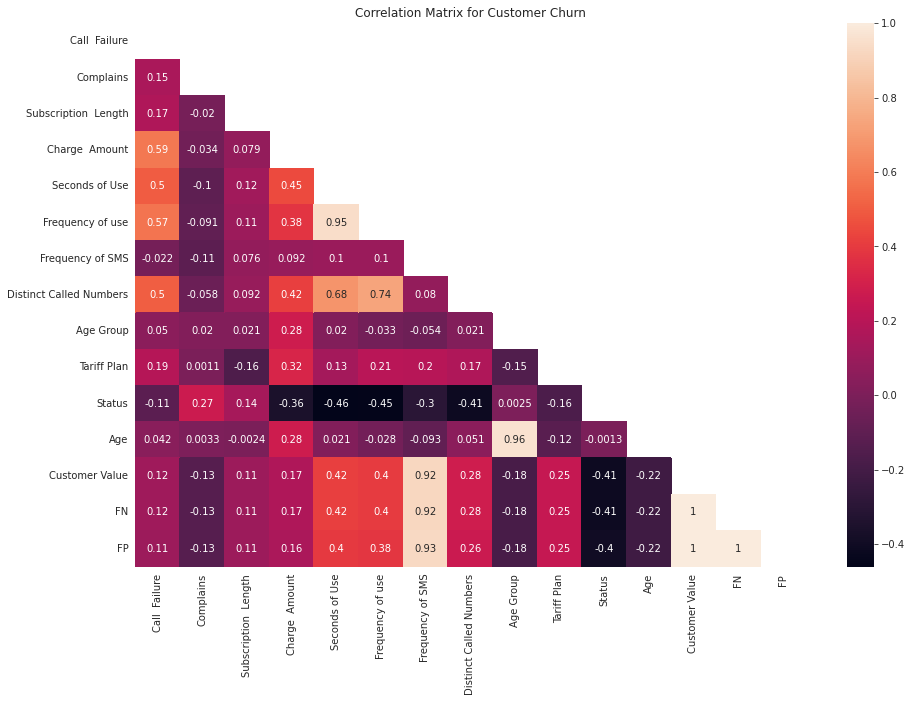

In [ ]:
plt.figure(figsize = (15,10))
corr_mat = data.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_mat, mask=mask, annot=True)
plt.title('Correlation Matrix for Customer Churn')

#Exploratory Data Analysis

Viewing the percentage of Churned user to that of Non Churned user

In [ ]:
c_labels = ['Non Churn', 'Churn']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),\
              1, 1)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",height = 500, width = 500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show(renderer= 'colab')

It is clear that majority of the customers 84% didn't churn, leaving just a few customer that churned 16%

In [ ]:
data['Age Group'].value_counts()

3    1425
2    1037
4     395
5     170
1     123
Name: Age Group, dtype: int64

In [ ]:
fig =px.histogram(data['Age'], x='Age', nbins= 5)

fig.update_layout(height=500, width=700, title_text="Age Distribution")
fig.show(renderer = 'colab')

The bulk of the users falls within the ages 25 and 30

In [ ]:
data['Complains'].value_counts()

0    2909
1     241
Name: Complains, dtype: int64

In [ ]:
data['Call  Failure'].value_counts()

In [ ]:
complain = data.groupby(['Complains', 'Churn']).agg({'Churn': 'count'})\
.rename(columns = {'Churn': 'count'}).reset_index()
complain.iloc[[0,1], 0] = 'Not Complained'
complain.iloc[[2,3], 0] = 'Complained'
complain

,Complains,Churn,count
0,Not Complained,Churn,295
1,Not Complained,Non Churn,2614
2,Complained,Churn,200
3,Complained,Non Churn,41


In [ ]:
data['Status'].unique()

array([1, 2])

In [ ]:
fig = px.sunburst(complain, path = ['Complains', 'Churn'], values = 'count', \
                  color = 'Complains', title = 'Affect of complains on customer churn',
                 color_discrete_map = {'Not Complained': '#336B87', 'Complained': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', \
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show(renderer="colab")


In [ ]:
status = data.groupby(['Status', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
status.iloc[[0,1], 0] = 'Active'
status.iloc[[2,3], 0] = 'Non Active'
status

,Status,Churn,count
0,Active,Churn,125
1,Active,Non Churn,2243
2,Non Active,Churn,370
3,Non Active,Non Churn,412


In [ ]:
fig = px.sunburst(status, path = ['Status', 'Churn'], values = 'count', color = 'Status', title = 'Affect of status on customer churn',
                 color_discrete_map = {'Not Active': '#336B87', 'Active': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show(renderer="colab")

In [ ]:
tariff = data.groupby(['Tariff Plan', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
tariff.iloc[[0,1], 0] = 'Active'
tariff.iloc[[2,3], 0] = 'Non Active'
tariff

,Tariff Plan,Churn,count
0,Active,Churn,489
1,Active,Non Churn,2416
2,Non Active,Churn,6
3,Non Active,Non Churn,239


In [ ]:
fig = px.sunburst(tariff, path = ['Tariff Plan', 'Churn'], values = 'count', \
                  color = 'Tariff Plan', title = 'Affect of Tariff Plan on customer churn',
                 color_discrete_map = {'Not Active': '#403433', 'Active': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', \
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show(renderer="colab")

In [ ]:
age = data.groupby(['Age Group', 'Churn']).agg({'Churn': 'count'}).\
                    rename(columns = {'Churn': 'count'}).reset_index()
age

,Age Group,Churn,count
0,1,Non Churn,123
1,2,Churn,184
2,2,Non Churn,853
3,3,Churn,230
4,3,Non Churn,1195
5,4,Churn,79
6,4,Non Churn,316
7,5,Churn,2
8,5,Non Churn,168


In [ ]:
fig = px.sunburst(age, path = ['Age Group', 'Churn'], values = 'count', color = \
                  'Age Group', title = 'Affect of customer age on customer churn',
                 color_discrete_map = {'Not Active': '#336B87', 'Active': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', \
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show(renderer="colab")


**The most important factors affecting customer churn:**
1. Users who do not complain are still likely to leave.
2. Users who are non active are most likely to leave.
3. Users who uses Tarrif plans have more chances to leave compaired to that with non active Tarrif plans
4. Customers who are in the group age of 2 and 3 uses the service more and are more likely to leave, compare to user with age group of 1 and 5

In [ ]:
data['Tariff Plan'].nunique()

2

In [ ]:
  fig = px.histogram(data, x="Subscription  Length", color="Churn", marginal="box", nbins= 200)

fig.update_layout(height=500, width=1200, title_text="Distribution of the subscription length within the last 12 months")
fig.show(renderer= 'colab')

User with higher subscription are most likely to churn than users with low subscription


In [ ]:
fig = px.histogram(data, x="Seconds of Use", color="Churn", marginal="box", nbins = 200)

fig.update_layout(height=500, width=1200, title_text="Distribution of the Seconds of Use within the last 12 months")
fig.show(renderer= 'colab')

Users with the seconds of use within the range of 0-3399 have more chances of churning compaired to that of higher users of use.

In [ ]:
x0 = data['Seconds of Use']
x1 = data['Seconds of Use']
# x1 = np.random.randn(2000) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
fig = px.histogram(data, x="Customer Value", color="Churn", marginal="box", nbins= 200)

fig.update_layout(height=500, width=1200,  title_text="Distribution of the Customer Value within the last 12 months")
fig.show(renderer= 'colab')

Users with customer value within the range of 0 - 500 have more chances to leave compare to users with higher customer value.

In [ ]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,Non Churn
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,Non Churn
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,Non Churn
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,Non Churn
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,Non Churn


In [ ]:
data['Subscription  Length'].unique()

array([38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 18, 17, 15, 16,  9, 40,
       41, 29, 28, 20, 19, 11, 32, 24, 23, 13, 14,  7, 42, 43, 30, 22, 21,
       12,  5, 44, 45, 10,  3,  6,  8,  4, 46, 47])

In [ ]:
fig = px.histogram(data, x="Customer Value", y="Seconds of Use", histfunc='avg',nbins= 300)
fig.update_layout(height=500, width=1200,  title_text="Average")
fig.show(renderer = 'colab')

In [ ]:
fig = px.histogram(data, x="Subscription  Length", y="Frequency of use", histfunc='avg',nbins= 500)
fig.update_layout(height=500, width=1200,  title_text="Average")
fig.show(renderer = 'colab')

The higher the subscription length the more time the users make use of the service. 

In [ ]:
fig = px.histogram(data, x="Distinct Called Numbers", y="Call  Failure", histfunc='avg',nbins= 200)
fig.update_layout(height=500, width=1200,  title_text="Average")
fig.show(renderer = 'colab')

Users that make distinct calls have more chances of having call failure.

In [ ]:
bins= [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,\
        200,210,220,230,240,250,260]
labels = ['0-9','10-19','20-29','30-39','40-49', '50-59','60-69','70-79', '80-89',\
        '90-99', '100-109','110-119','120-129','130-139','140-149', '150-159', \
        '160-169','170-179', '180-189','190-199', '200-209','210-219','220-229',\
        '230-239','240-249', '250-259']
data_2 = data.assign(grouped_frequency = pd.cut(data['Frequency of use'], bins \
                                                      = bins, labels = labels ))

In [ ]:
df_pivot = data_2.pivot_table(index = 'grouped_frequency', \
                          columns = 'Churn', values='Frequency of use',\
                          aggfunc='count', margins = True, margins_name='Total')
df_pivot_2 = df_pivot.fillna(0)
df_pivot_3 = df_pivot_2.style.format('{:,.0f}')

In [ ]:
df_pivot_4 = df_pivot_2.reset_index()
# df_pivot_2.head(5)

In [ ]:
frequ = df_pivot_4.grouped_frequency[:-1]

fig = go.Figure()
fig.add_trace(go.Bar(x=frequ,
                y=df_pivot_4['Churn'],
                name='Churn',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=frequ,
                y=df_pivot_4['Non Churn'],
                name='Non Churn',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Frequency of Use',
    height=500, width=1200,
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show(renderer = 'colab')

users with low frequency of use have a much higher chances of leaving compaired to that with much higher frequency of use.